In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 질병 정보 파일 읽기
#path = "/content/drive/MyDrive/기계학습/질병정보.csv"
path = "/content/drive/MyDrive/기계학습/진료정보/질병_발생률.csv"
df = pd.read_csv(path,encoding='cp949')

In [ ]:
# 샘플, 변수 수 확인
print(df.shape)

(486949, 7)


In [ ]:
# DataFrame 정보 확인
df.info()
len(df[df['인구수'] == 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486949 entries, 0 to 486948
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DATE        486949 non-null  object 
 1   시군구지역코드     486949 non-null  int64  
 2   인구수         482949 non-null  float64
 3   감기 발생률(%)   486763 non-null  float64
 4   눈병 발생률(%)   486075 non-null  float64
 5   천식 발생률(%)   485976 non-null  float64
 6   피부염 발생률(%)  486233 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 26.0+ MB


1306

In [ ]:
#결측치 확인
df.describe()

,시군구지역코드,인구수,감기 발생률(%),눈병 발생률(%),천식 발생률(%),피부염 발생률(%)
count,486949.000000,482949.000000,486763.00,486075.00,485976.00,486233.00
mean,38141.160208,203237.405999,inf,inf,inf,inf
std,11299.258942,163571.960888,NaN,NaN,NaN,NaN
min,11110.000000,0.000000,0.00,0.00,0.00,0.00
25%,29170.000000,54733.000000,0.32,0.04,0.02,0.07
50%,42730.000000,173555.000000,0.57,0.07,0.04,0.10
75%,46730.000000,307969.000000,0.93,0.09,0.06,0.14
max,49130.000000,896147.000000,inf,inf,inf,inf


In [ ]:
# 인구수 0을 결측치로 처리 #
df['인구수'].replace(0, np.nan, inplace=True)
df['인구수']
#df['감기 발생률%)'].replace(0, np.nan, inplace=True)
#df['눈병 발생률%)'].replace(0, np.nan, inplace=True)
#df['천식 발생률%)'].replace(0, np.nan, inplace=True)
#df['피부염 발생률%)'].replace(0, np.nan, inplace=True)
# 결측치 제거
df.dropna(inplace=True)

df.describe()

,시군구지역코드,인구수,감기 발생률(%),눈병 발생률(%),천식 발생률(%),피부염 발생률(%)
count,481643.000000,481643.000000,481643.000000,481643.000000,481643.000000,481643.000000
mean,38081.542973,203788.494777,0.638850,0.069941,0.044232,0.100042
std,11305.314621,163450.391427,0.419792,0.048136,0.034029,0.059328
min,11110.000000,8775.000000,0.000000,0.000000,0.000000,0.000000
25%,29170.000000,55265.000000,0.320000,0.040000,0.020000,0.070000
50%,42720.000000,174068.000000,0.570000,0.070000,0.040000,0.100000
75%,46720.000000,308275.000000,0.910000,0.090000,0.060000,0.130000
max,48890.000000,896147.000000,3.690000,0.670000,0.480000,0.550000


In [ ]:
# 중복 칼럼 확인
df.duplicated().sum() # 없음

0

In [ ]:
# 시군구지역코드 -> 시군구 #
# 지역코드와 시군구명 데이터 읽기

# 시군구명 앞 두 글자를 기반으로 한 지역명 칼럼 추가
df['시군구지역코드'] = df['시군구지역코드'].astype(str)
df['지역'] = df['시군구지역코드'].apply(lambda x:
'서울' if x[:2] == '11' else
'부산' if x[:2] == '26' else
'대구' if x[:2] == '27' else
'인천' if x[:2] == '28' else
'광주' if x[:2] == '29' else
'대전' if x[:2] == '30' else
'울산' if x[:2] == '31' else
'세종' if x[:2] == '36' else
'경기' if x[:2] == '41' else
'강원' if x[:2] == '42' else
'충북' if x[:2] == '43' else
'충남' if x[:2] == '44' else
'전북' if x[:2] == '45' else
'전남' if x[:2] == '46' else
'경북' if x[:2] == '47' else
'경남' if x[:2] == '48' else
'제주' if x[:2] == '50' else
'죽여줘...'
)
print(df.head())

         DATE 시군구지역코드       인구수  감기 발생률(%)  눈병 발생률(%)  천식 발생률(%)  피부염 발생률(%)  \
0  2017-03-01   11110  147918.0       0.13       0.01       0.01        0.00   
1  2017-03-01   11140  119869.0       0.12       0.01       0.01        0.00   
2  2017-03-01   11170  219333.0       0.12       0.00       0.01        0.00   
3  2017-03-01   11200  298030.0       0.15       0.00       0.02        0.01   
4  2017-03-01   11215  351635.0       0.13       0.00       0.00        0.00   

   지역  
0  서울  
1  서울  
2  서울  
3  서울  
4  서울  


In [ ]:
# 시군구지역코드 -> 시군구 #

# 지역코드와 시군구명 데이터 읽기
df_mapping = pd.read_csv("/content/drive/MyDrive/기계학습/진료정보/시군구 지역코드.csv", encoding='cp949')

# 지역코드와 질병 발생건수 데이터 읽기

# 지역코드와 시군구명을 딕셔너리로 변환
mapping_dict = dict(zip(df_mapping['시군구지역코드'], df_mapping['시군구명']))

# 지역코드를 시군구명으로 변환
df['시군구지역코드'] = df['시군구지역코드'].astype(int)
df['시군구명'] = df['시군구지역코드'].map(mapping_dict)

# '시군구지역코드' 칼럼 제거
#df.drop(['시군구지역코드'], axis=1, inplace=True)

# 시군구명 칼럼 이름을 '시군구'로 변경
df.rename(columns={'시군구명': '시군구'}, inplace=True)
# 열의 순서 변경
#df = df[['DATE', '시군구', '인구수', '감기 발생률(%)', '눈병 발생률(%)', '천식 발생률(%)', '피부염 발생률(%)']]

# '인구수' 열의 데이터 유형을 정수로 변환 (EDA전 오류)
#df_disease['인구수'] = df_disease['인구수'].astype(int)

# 'DATE' 열의 데이터 유형을 datetime으로 변경
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.head())
#df.to_csv("/content/drive/MyDrive/기계학습/확인좀하자.csv", index=False, encoding='cp949')

        DATE  시군구지역코드       인구수  감기 발생률(%)  눈병 발생률(%)  천식 발생률(%)  피부염 발생률(%)  \
0 2017-03-01    11110  147918.0       0.13       0.01       0.01        0.00   
1 2017-03-01    11140  119869.0       0.12       0.01       0.01        0.00   
2 2017-03-01    11170  219333.0       0.12       0.00       0.01        0.00   
3 2017-03-01    11200  298030.0       0.15       0.00       0.02        0.01   
4 2017-03-01    11215  351635.0       0.13       0.00       0.00        0.00   

   지역  시군구  
0  서울  종로구  
1  서울   중구  
2  서울  용산구  
3  서울  성동구  
4  서울  광진구  


In [ ]:
print(df['지역'].dtype)
print(df['시군구'].dtype)

object
object


In [ ]:
# '지역'과 '시군구' 칼럼을 합쳐서 '시군구' 칼럼으로
df['시군구'] = df['지역'] +' '+ df['시군구']

# '지역' 칼럼 제거
df.drop('지역', axis=1, inplace=True)

# 결과 확인
print(df.head())

        DATE  시군구지역코드       인구수  감기 발생률(%)  눈병 발생률(%)  천식 발생률(%)  피부염 발생률(%)  \
0 2017-03-01    11110  147918.0       0.13       0.01       0.01        0.00   
1 2017-03-01    11140  119869.0       0.12       0.01       0.01        0.00   
2 2017-03-01    11170  219333.0       0.12       0.00       0.01        0.00   
3 2017-03-01    11200  298030.0       0.15       0.00       0.02        0.01   
4 2017-03-01    11215  351635.0       0.13       0.00       0.00        0.00   

      시군구  
0  서울 종로구  
1   서울 중구  
2  서울 용산구  
3  서울 성동구  
4  서울 광진구  


In [ ]:
df2 = df[['DATE', '시군구', '인구수', '감기 발생률(%)', '눈병 발생률(%)', '천식 발생률(%)', '피부염 발생률(%)']]
print(df2.head())
df2.to_csv("/content/drive/MyDrive/기계학습/질병_데이터.csv", index=False, encoding='cp949')

        DATE     시군구       인구수  감기 발생률(%)  눈병 발생률(%)  천식 발생률(%)  피부염 발생률(%)
0 2017-03-01  서울 종로구  147918.0       0.13       0.01       0.01        0.00
1 2017-03-01   서울 중구  119869.0       0.12       0.01       0.01        0.00
2 2017-03-01  서울 용산구  219333.0       0.12       0.00       0.01        0.00
3 2017-03-01  서울 성동구  298030.0       0.15       0.00       0.02        0.01
4 2017-03-01  서울 광진구  351635.0       0.13       0.00       0.00        0.00


In [ ]:
# '인구수' 칼럼을 데이터프레임에서 지우기
# df.drop(columns=['인구수'], inplace=True)
df2.describe()

,DATE,인구수,감기 발생률(%),눈병 발생률(%),천식 발생률(%),피부염 발생률(%)
count,481643,481643.000000,481643.000000,481643.000000,481643.000000,481643.000000
mean,2019-10-29 18:16:22.810920448,203788.494777,0.638850,0.069941,0.044232,0.100042
min,2017-03-01 00:00:00,8775.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-06-29 00:00:00,55265.000000,0.320000,0.040000,0.020000,0.070000
50%,2019-10-30 00:00:00,174068.000000,0.570000,0.070000,0.040000,0.100000
75%,2021-02-28 00:00:00,308275.000000,0.910000,0.090000,0.060000,0.130000
max,2022-06-30 00:00:00,896147.000000,3.690000,0.670000,0.480000,0.550000
std,NaN,163450.391427,0.419792,0.048136,0.034029,0.059328


In [ ]:
# 감기 #
df['감기 발생률(%)'].describe()

count    481643.000000
mean          0.638850
std           0.419792
min           0.000000
25%           0.320000
50%           0.570000
75%           0.910000
max           3.690000
Name: 감기 발생률(%), dtype: float64

<ipython-input-71-d51819faf3d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['감기 발생률(%)'], kde=True)


<Axes: ylabel='Density'>

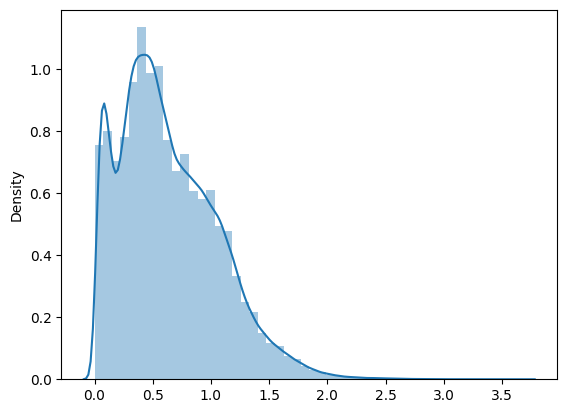

In [ ]:
# 히스토그램 + KDE
sns.distplot(x=df['감기 발생률(%)'], kde=True)

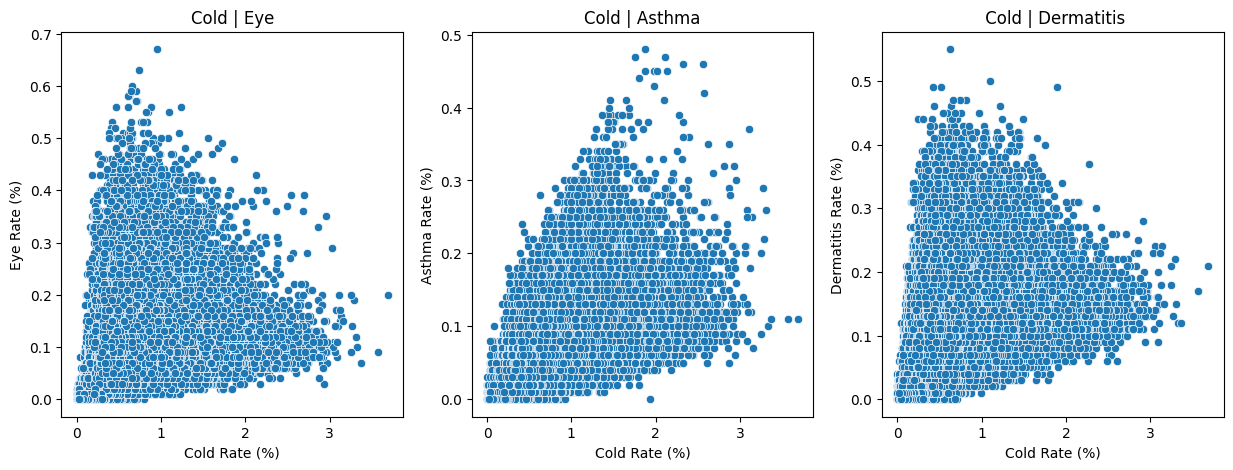

In [ ]:
plt.figure(figsize=(15, 5))

# 산점도 그래프: 감기 발생률(%) vs 눈병 발생률(%)
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='감기 발생률(%)', y='눈병 발생률(%)')
plt.title('Cold | Eye')
plt.xlabel('Cold Rate (%)')
plt.ylabel('Eye Rate (%)')

# 산점도 그래프: 감기 발생률(%) vs 천식 발생률(%)
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='감기 발생률(%)', y='천식 발생률(%)')
plt.title('Cold | Asthma')
plt.xlabel('Cold Rate (%)')
plt.ylabel('Asthma Rate (%)')

# 그래프: 감기 발생률(%) vs 피부염 발생률(%)
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='감기 발생률(%)', y='피부염 발생률(%)')
plt.title(' Cold | Dermatitis')
plt.xlabel('Cold Rate (%)')
plt.ylabel('Dermatitis Rate (%)')

plt.show()

In [ ]:
# 눈병 #
df['눈병 발생률(%)'].describe()

count    481643.000000
mean          0.069941
std           0.048136
min           0.000000
25%           0.040000
50%           0.070000
75%           0.090000
max           0.670000
Name: 눈병 발생률(%), dtype: float64

<ipython-input-63-6ece63f24e12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['눈병 발생률(%)'], kde=True)


<Axes: ylabel='Density'>

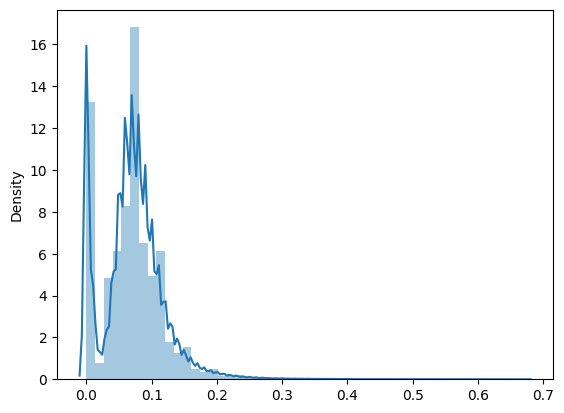

In [ ]:
# 히스토그램 + KDE
sns.distplot(x=df['눈병 발생률(%)'], kde=True)

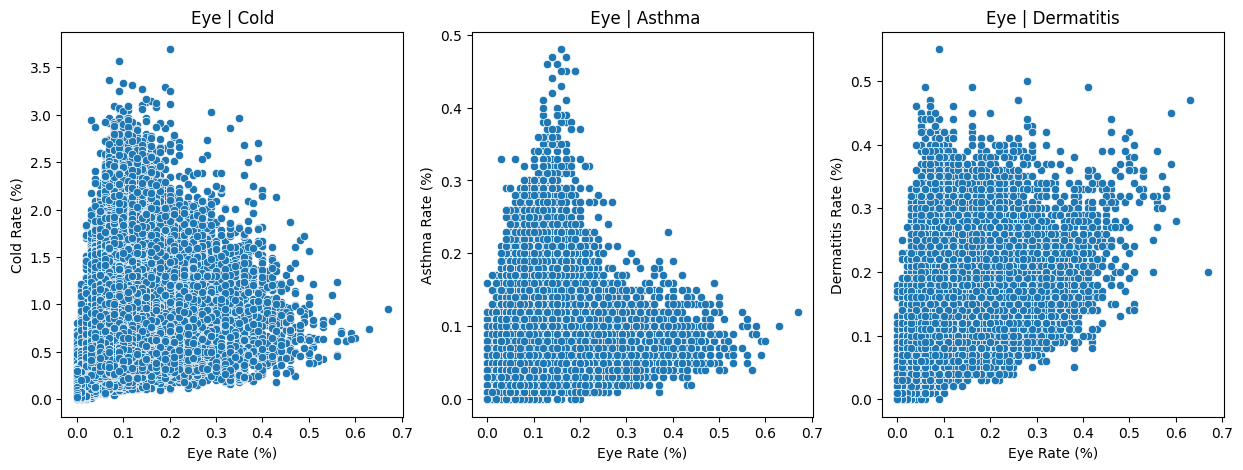

In [ ]:
plt.figure(figsize=(15, 5))

# 산점도 그래프: 눈병 발생률(%) vs 감기 발생률(%)
plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째 그래프
sns.scatterplot(data=df, x='눈병 발생률(%)', y='감기 발생률(%)')
plt.title('Eye | Cold')
plt.xlabel('Eye Rate (%)')
plt.ylabel('Cold Rate (%)')

# 산점도 그래프: 눈병 발생률(%) vs 천식 발생률(%)
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='눈병 발생률(%)', y='천식 발생률(%)')
plt.title(' Eye | Asthma')
plt.xlabel('Eye Rate (%)')
plt.ylabel('Asthma Rate (%)')

# 세 번째 산점도 그래프: 눈병 발생률(%) vs 피부염 발생률(%)
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='눈병 발생률(%)', y='피부염 발생률(%)')
plt.title('Eye | Dermatitis')
plt.xlabel('Eye Rate (%)')
plt.ylabel('Dermatitis Rate (%)')

plt.show()

In [ ]:
# 천식 #
df['천식 발생률(%)'].describe()

count    481643.000000
mean          0.044232
std           0.034029
min           0.000000
25%           0.020000
50%           0.040000
75%           0.060000
max           0.480000
Name: 천식 발생률(%), dtype: float64

<ipython-input-19-d1185b8ecec4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['천식 발생률(%)'], kde=True)


<Axes: ylabel='Density'>

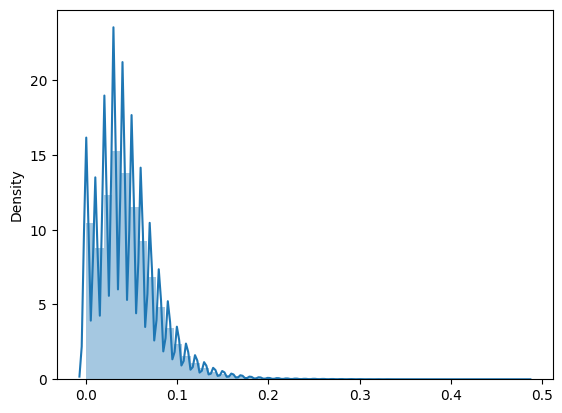

In [ ]:
# 히스토그램 + KDE
sns.distplot(x=df['천식 발생률(%)'], kde=True)

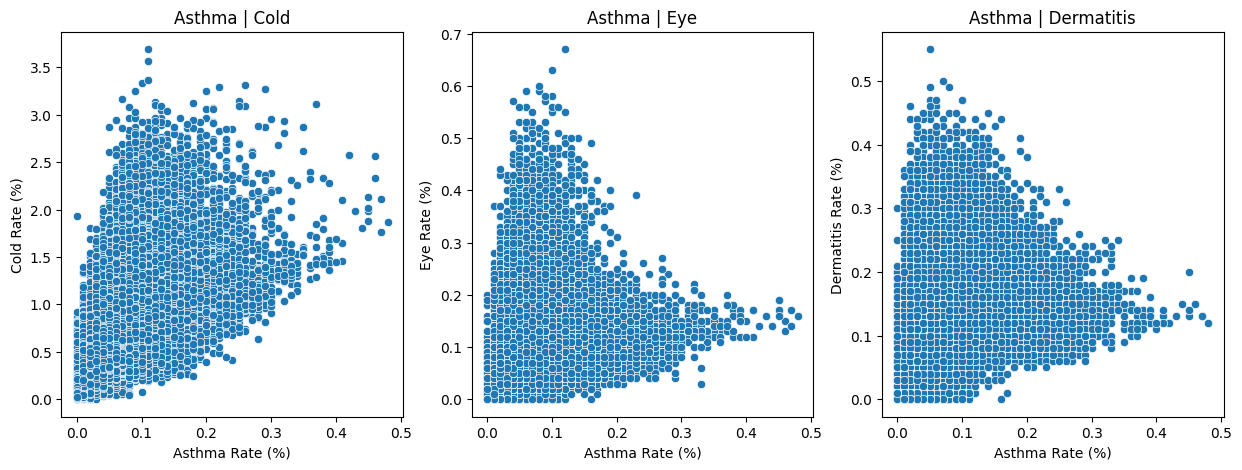

In [ ]:
plt.figure(figsize=(15, 5))

# 산점도 그래프: 천식 발생률(%) vs 감기 발생률(%)
plt.subplot(1, 3, 1)  # 1행 3열 중 첫 번째 그래프
sns.scatterplot(data=df, x='천식 발생률(%)', y='감기 발생률(%)')
plt.title('Asthma | Cold')
plt.xlabel('Asthma Rate (%)')
plt.ylabel('Cold Rate (%)')

# 산점도 그래프: 천식 발생률(%) vs 눈병 발생률(%)
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='천식 발생률(%)', y='눈병 발생률(%)')
plt.title('Asthma | Eye')
plt.xlabel('Asthma Rate (%)')
plt.ylabel('Eye Rate (%)')

# 산점도 그래프: 천식 발생률(%) vs 피부염 발생률(%)
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='천식 발생률(%)', y='피부염 발생률(%)')
plt.title('Asthma | Dermatitis')
plt.xlabel('Asthma Rate (%)')
plt.ylabel('Dermatitis Rate (%)')

plt.show()

In [ ]:
# 피부염 #
df['피부염 발생률(%)'].describe()

count    481643.000000
mean          0.100042
std           0.059328
min           0.000000
25%           0.070000
50%           0.100000
75%           0.130000
max           0.550000
Name: 피부염 발생률(%), dtype: float64

<ipython-input-20-d373967a7ba0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['피부염 발생률(%)'], kde=True)


<Axes: ylabel='Density'>

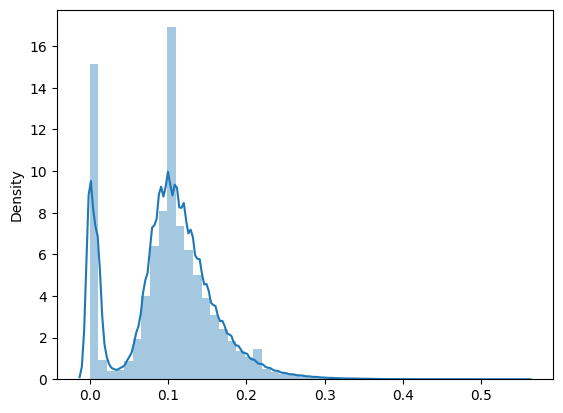

In [ ]:
# 히스토그램 + KDE
sns.distplot(x=df['피부염 발생률(%)'], kde=True)

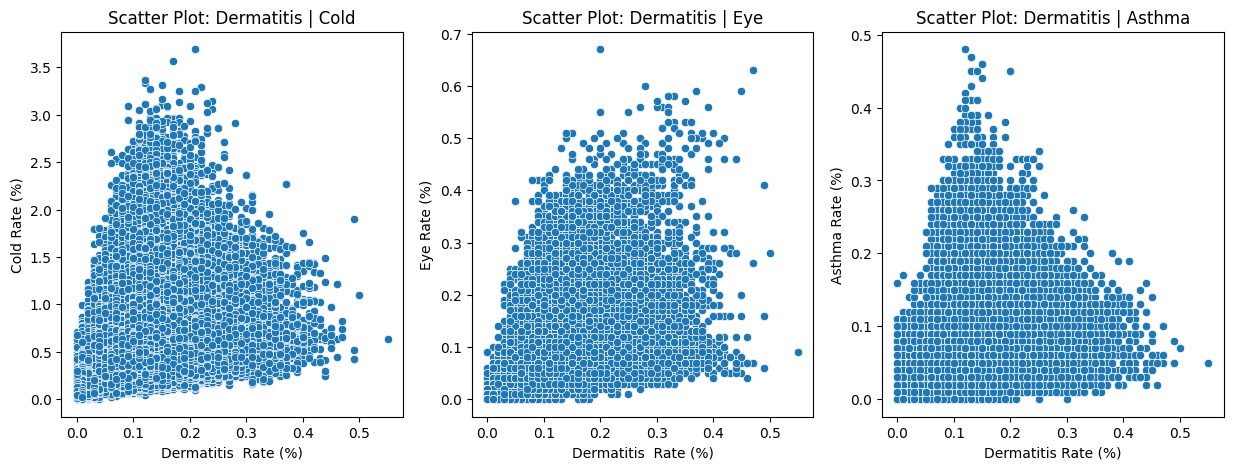

In [ ]:
plt.figure(figsize=(15, 5))

# 산점도 그래프: 피부염 발생률(%) vs 감기 발생률(%)
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='피부염 발생률(%)', y='감기 발생률(%)')
plt.title('Dermatitis | Cold')
plt.xlabel('Dermatitis  Rate (%)')
plt.ylabel('Cold Rate (%)')

# 산점도 그래프: 피부염 발생률(%) vs 눈병 발생률(%)
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='피부염 발생률(%)', y='눈병 발생률(%)')
plt.title('Dermatitis | Eye')
plt.xlabel('Dermatitis Rate (%)')
plt.ylabel('Eye Rate (%)')

# 산점도 그래프: 피부염 발생률(%) vs 천식 발생률(%)
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='피부염 발생률(%)', y='천식 발생률(%)')
plt.title('Dermatitis | Asthma')
plt.xlabel('Dermatitis Rate (%)')
plt.ylabel('Asthma Rate (%)')

plt.show()  # 그래프 표시

In [ ]:
# 'DATE' 열을 제외한 시군구별로 데이터 그룹화하여 각 그룹에 대해 평균 계산
diseases_avg = df.drop('DATE', axis=1).groupby('시군구').mean().reset_index()
cold = diseases_avg.sort_values(by='감기 발생률(%)', ascending=False).head(20)
eye = diseases_avg.sort_values(by='눈병 발생률(%)', ascending=False).head(20)
asthma = diseases_avg.sort_values(by='천식 발생률(%)', ascending=False).head(20)
dermatitis = diseases_avg.sort_values(by='피부염 발생률(%)', ascending=False).head(20)

# 결과 출력
print("Top 20 시군구 (감기 발생률):")
print(cold[['시군구', '감기 발생률(%)']])
print()
print("Top 20 시군구 (눈병 발생률):")
print(eye[['시군구', '눈병 발생률(%)']])
print()
print("Top 20 시군구 (천식 발생률):")
print(asthma[['시군구', '천식 발생률(%)']])
print()
print("Top 20 시군구 (피부염 발생률):")
print(dermatitis[['시군구', '피부염 발생률(%)']])

Top 20 시군구 (감기 발생률):
         시군구  감기 발생률(%)
72      미추홀구   0.909138
101  세종특별자치시   0.898901
144      오산시   0.860026
56       달성군   0.852762
41       기장군   0.845852
44       김포시   0.844122
222      화성시   0.843691
5        강서구   0.827623
114      아산시   0.817028
198  청주시 청원구   0.811699
212      하남시   0.801627
179      증평군   0.794641
145      옥천군   0.791088
112      시흥시   0.786617
157      유성구   0.783147
59       대덕구   0.778609
171  전주시 덕진구   0.778496
122      양산시   0.774897
35       군산시   0.769471
106  수원시 권선구   0.767608

Top 20 시군구 (눈병 발생률):
     시군구  눈병 발생률(%)
51   남해군   0.249502
181  진안군   0.170801
93   서천군   0.156797
110  순창군   0.153414
42   김제시   0.145791
179  증평군   0.142936
19   고창군   0.140816
89   상주시   0.130708
38   금산군   0.126273
141  영천시   0.116211
133  영덕군   0.115560
205  통영시   0.111304
9    거창군   0.105678
14   고령군   0.104548
168  장성군   0.104384
135  영동군   0.104081
31   구례군   0.101684
169  장수군   0.101638
127  여수시   0.100180
174  정읍시   0.099138

Top 20 시군구 (천식 발생률):
     시군구  천

In [ ]:
# 'DATE'를 기준으로 데이터 그룹화하여 각 그룹에 대해 질병 발생률의 평균 계산
diseases_avg = df.drop('시군구', axis=1).groupby('DATE').mean().reset_index()

# 각 질병 발생률에 대해 상위 20개의 날짜 추출
cold = diseases_avg.sort_values(by='감기 발생률(%)', ascending=False).head(20)
eye = diseases_avg.sort_values(by='눈병 발생률(%)', ascending=False).head(20)
asthma = diseases_avg.sort_values(by='천식 발생률(%)', ascending=False).head(20)
dermatitis= diseases_avg.sort_values(by='피부염 발생률(%)', ascending=False).head(20)

# 결과 출력
print("Top 20 날짜 (감기 발생률):")
print(cold[['DATE', '감기 발생률(%)']])
print()
print("Top 20 날짜 (눈병 발생률):")
print(eye[['DATE', '눈병 발생률(%)']])
print()
print("Top 20 날짜 (천식 발생률):")
print(asthma[['DATE', '천식 발생률(%)']])
print()
print("Top 20 날짜 (피부염 발생률):")
print(dermatitis[['DATE', '피부염 발생률(%)']])

Top 20 날짜 (감기 발생률):
            DATE  감기 발생률(%)
307   2018-01-02   2.595000
300   2017-12-26   2.385645
313   2018-01-08   2.230161
663   2018-12-24   2.044251
670   2018-12-31   1.946599
320   2018-01-15   1.916290
656   2018-12-17   1.911134
303   2017-12-29   1.893710
310   2018-01-05   1.867258
1034  2019-12-30   1.861903
292   2017-12-18   1.845766
649   2018-12-10   1.813158
1063  2020-01-28   1.796437
665   2018-12-26   1.789798
1041  2020-01-06   1.725061
26    2017-03-27   1.715000
1037  2020-01-02   1.714980
642   2018-12-03   1.712915
1027  2019-12-23   1.708947
635   2018-11-26   1.689717

Top 20 날짜 (눈병 발생률):
           DATE  눈병 발생률(%)
929  2019-09-16   0.157126
537  2018-08-20   0.150526
575  2018-09-27   0.145385
180  2017-08-28   0.143750
159  2017-08-07   0.143185
558  2018-09-10   0.142955
565  2018-09-17   0.140931
901  2019-08-19   0.140769
523  2018-08-06   0.140648
68   2017-05-08   0.140000
516  2018-07-30   0.139676
173  2017-08-21   0.139516
551  2018-09-03   0.

In [ ]:
df.to_csv("/content/drive/MyDrive/기계학습/질병정보_EDA.csv", index=False, encoding='cp949')

In [ ]:
# 안씀 #